# Gender and School Performance

### Analysis Outline:
0. Get the data ready
1. General information on Boys and Girls in UK schools.
2. What do single-sex schools tell us?
3. How Girls/Boys ratio effect the school performance
4. Best Performers.
5. Conclusion

## 0. Get data ready

##### Other rating metrics (progress columns).
Basically using two different metrics 1. OFSTEDRATING 2. STUDENT-PROGRESS

ks2final - schools : 16000+ , ratings available : 16000+.

ks4final - schools : 5000+ , p8 ratings available : 3000+

Makes sense to link data and then use ks2final data for judging schools.
prog scores vary between -5 to +5 with some school as exceptions.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# School performance 
root='data/'
schooldf = pd.read_csv(root+'england_school_information.csv')
ks2df = pd.read_csv(root+'england_ks2final.csv', low_memory=False)
censusdf = pd.read_csv(root+'england_census.csv')

In [55]:
sdf = schooldf[schooldf['ISPRIMARY']==1]
sdf.head(2)

,URN,LANAME,LA,ESTAB,LAESTAB,SCHNAME,STREET,LOCALITY,ADDRESS3,TOWN,...,ISPRIMARY,ISSECONDARY,ISPOST16,AGELOW,AGEHIGH,GENDER,RELCHAR,ADMPOL,OFSTEDRATING,OFSTEDLASTINSP
0,100000,City of London,201,3614,2013614,The Aldgate School,St James's Passage,Duke's Place,NaN,London,...,1,0,0,3.0,11.0,Mixed,Church of England,Not applicable,Outstanding,19-04-2013
1,100001,City of London,201,6005,2016005,City of London School for Girls,St Giles' Terrace,Barbican,NaN,London,...,1,1,1,7.0,18.0,Girls,None,Selective,NaN,NaN


In [56]:
# Census DF
cdf = censusdf[['URN','NORG', 'NORB','PNORG', 'PNORB']]
cdf = cdf.dropna()
cdf=cdf[cdf['URN']!='NAT']
cdf['URN']=cdf['URN'].astype(str).astype(int)
cdf.head(2)

,URN,NORG,NORB,PNORG,PNORB
0,100000,141.0,144.0,49.5,50.5
1,100001,752.0,0.0,100.0,0.0


In [57]:
# Progress DF
progdf = ks2df[['URN','SCHNAME','READPROG','WRITPROG','MATPROG']]
progdf = progdf.dropna()
progdf=progdf[progdf['URN']!=' ']
progdf = progdf[(progdf['READPROG']!='SUPP') & (progdf['READPROG']!='LOWCOV')]
progdf = progdf[(progdf['WRITPROG']!='SUPP') & (progdf['WRITPROG']!='LOWCOV')]
progdf = progdf[(progdf['MATPROG']!='SUPP') & (progdf['MATPROG']!='LOWCOV')]

progdf['URN']=progdf['URN'].astype(str).astype(int)

progdf['READPROG']=progdf['READPROG'].astype(float)
progdf['WRITPROG']=progdf['WRITPROG'].astype(float)
progdf['MATPROG']=progdf['MATPROG'].astype(float)
# progdf['PROG'] = progdf[['READPROG','WRITPROG','MATPROG']].mean(axis=1)
progdf.head(2) # len: 15337

,URN,SCHNAME,READPROG,WRITPROG,MATPROG
0,141279,Bringhurst Primary School,2.6,2.3,2.0
1,119910,Buckminster Primary School,2.4,3.8,-1.0


In [58]:
# Schooldf and Progress DF Merged
progsdf = pd.merge(progdf, sdf, on='URN', how='inner')
print(len(progsdf))
progsdf.head(2)

15337


,URN,SCHNAME_x,READPROG,WRITPROG,MATPROG,LANAME,LA,ESTAB,LAESTAB,SCHNAME_y,...,ISPRIMARY,ISSECONDARY,ISPOST16,AGELOW,AGEHIGH,GENDER,RELCHAR,ADMPOL,OFSTEDRATING,OFSTEDLASTINSP
0,141279,Bringhurst Primary School,2.6,2.3,2.0,Leicestershire,855,2016,8552016,Bringhurst Primary School,...,1,0,0,4.0,11.0,Mixed,Does not apply,Not applicable,Good,23-05-2017
1,119910,Buckminster Primary School,2.4,3.8,-1.0,Leicestershire,855,2017,8552017,Buckminster Primary School,...,1,0,0,4.0,11.0,Mixed,Does not apply,Not applicable,Good,30-01-2018


In [59]:
# Census and Progress DF Merged
progcdf = pd.merge(progsdf, cdf, on='URN', how='inner')
print(len(progcdf))
progcdf.head(2)

15153


,URN,SCHNAME_x,READPROG,WRITPROG,MATPROG,LANAME,LA,ESTAB,LAESTAB,SCHNAME_y,...,AGEHIGH,GENDER,RELCHAR,ADMPOL,OFSTEDRATING,OFSTEDLASTINSP,NORG,NORB,PNORG,PNORB
0,141279,Bringhurst Primary School,2.6,2.3,2.0,Leicestershire,855,2016,8552016,Bringhurst Primary School,...,11.0,Mixed,Does not apply,Not applicable,Good,23-05-2017,75.0,85.0,46.9,53.1
1,119910,Buckminster Primary School,2.4,3.8,-1.0,Leicestershire,855,2017,8552017,Buckminster Primary School,...,11.0,Mixed,Does not apply,Not applicable,Good,30-01-2018,42.0,53.0,44.2,55.8


In [60]:
# FINAL TABLE::
pdf = progcdf[['URN','SCHNAME_x','LOCALITY','TOWN','GENDER','NORB','PNORB','NORG','PNORG','READPROG','WRITPROG','MATPROG']]
pdf.head(2)

,URN,SCHNAME_x,LOCALITY,TOWN,GENDER,NORB,PNORB,NORG,PNORG,READPROG,WRITPROG,MATPROG
0,141279,Bringhurst Primary School,Bringhurst,Market Harborough,Mixed,85.0,53.1,75.0,46.9,2.6,2.3,2.0
1,119910,Buckminster Primary School,Buckminster,Grantham,Mixed,53.0,55.8,42.0,44.2,2.4,3.8,-1.0


In [61]:
# Mixed schools
mxd_pdf = pdf[pdf['GENDER']=='Mixed'] 
mxd_pdf['GBRATIO'] = mxd_pdf.loc[:,'NORG']/(mxd_pdf.loc[:,'NORB'])
mxd_pdf[['GBRATIO','NORG','NORB','PNORG','READPROG','WRITPROG','MATPROG']].corr()

/var/folders/ny/cvpfqk3159x1dk084txcwfjr0000gn/T/ipykernel_19495/4065059235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mxd_pdf['GBRATIO'] = mxd_pdf.loc[:,'NORG']/(mxd_pdf.loc[:,'NORB'])


,GBRATIO,NORG,NORB,PNORG,READPROG,WRITPROG,MATPROG
GBRATIO,1.000000,0.143437,-0.054298,0.962537,0.247824,0.281400,0.233760
NORG,0.143437,1.000000,0.971454,0.195814,0.080335,0.150591,0.219995
NORB,-0.054298,0.971454,1.000000,0.003976,0.031559,0.096586,0.173855
PNORG,0.962537,0.195814,0.003976,1.000000,0.296501,0.351592,0.301210
READPROG,0.247824,0.080335,0.031559,0.296501,1.000000,0.620828,0.784764
WRITPROG,0.281400,0.150591,0.096586,0.351592,0.620828,1.000000,0.671237
MATPROG,0.233760,0.219995,0.173855,0.301210,0.784764,0.671237,1.000000


In [62]:
pdf.head(2)

,URN,SCHNAME_x,LOCALITY,TOWN,GENDER,NORB,PNORB,NORG,PNORG,READPROG,WRITPROG,MATPROG
0,141279,Bringhurst Primary School,Bringhurst,Market Harborough,Mixed,85.0,53.1,75.0,46.9,2.6,2.3,2.0
1,119910,Buckminster Primary School,Buckminster,Grantham,Mixed,53.0,55.8,42.0,44.2,2.4,3.8,-1.0


## 1. General Information about Boys/Girls in UK

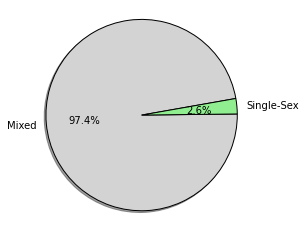

In [63]:
gendf = schooldf[['URN','GENDER','OFSTEDRATING']]
gendf = gendf.dropna()
gendf['GENDER0'] = np.where(gendf['GENDER']!='Mixed', 'Single-Sex', gendf['GENDER'])
df1 = gendf.groupby('GENDER0').count()

wp={'edgecolor':'black', 'linewidth':1}
plt.pie(df1['URN'],autopct='%1.1f%%',colors=['lightgray','lightgreen'],startangle=10,radius=1.1,labels=[x for x in df1.index],wedgeprops=wp,shadow=True)
plt.savefig('mixed_vs_ssex.jpg', dpi=200, bbox_inches='tight')
plt.show()

In [64]:
gendf = schooldf[['URN','GENDER','OFSTEDRATING']]
gendf = gendf.dropna()
gendf = gendf[gendf['GENDER']!='Mixed']

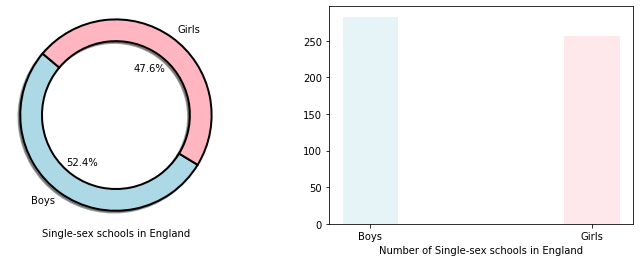

<Figure size 432x288 with 0 Axes>

In [65]:
# Idea about single-sex schools (Comparing amount of Boys schools and Girls schools)

import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(4)
fig.set_figwidth(12)
df1=gendf.groupby('GENDER').count()
wp={'edgecolor':'black', 'linewidth':2,'width':.25}
ax1.pie(df1['URN'],autopct='%1.1f%%',colors=['lightblue','lightpink'],startangle=140,radius=1.1,labels=[f"{x.replace('school','')}" for x in df1.index],wedgeprops=wp,shadow=True)
ax1.set_xlabel("Single-sex schools in England")

ax2.bar([x for x in df1.index], df1['URN'],color=['lightblue','lightpink'], width=0.25,alpha=0.3)
ax2.set_xlabel("Number of Single-sex schools in England")


# plt.xlabel('Single sex Schools in England')
plt.show()
plt.tight_layout()
fig.savefig('ssex_schools.jpg', dpi=200)


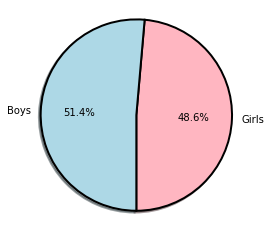

In [66]:
sdf = schooldf[['URN','GENDER','OFSTEDRATING']]
gendf = pd.merge(cdf, sdf, on='URN', how='inner')
gendf = gendf.dropna()

wp={'edgecolor':'black', 'linewidth':2}
plt.pie([gendf['NORG'].median(), gendf['NORB'].median()],autopct='%1.1f%%',colors=['lightpink','lightblue'],startangle=270,radius=1.1,labels=['Girls', 'Boys'],wedgeprops=wp,shadow=True)
plt.savefig('girls_vs_boys_avg_dist.jpg', dpi=200, bbox_inches='tight')
plt.show()

## 2. What do single sex schools tell us?

In [67]:
def eval(x):
    if x in ['Requires improvement','Serious Weaknesses', 'Inadequate', 'Special Measures']:
        return 2
    else:
        return 1

gendf = gendf[(gendf['OFSTEDRATING']!='Serious Weaknesses') & (gendf['OFSTEDRATING']!='Special Measures')]
gendf['EVAL'] = gendf['OFSTEDRATING'].apply(eval)
gendf.head(3)

,URN,NORG,NORB,PNORG,PNORB,GENDER,OFSTEDRATING,EVAL
0,100000,141.0,144.0,49.5,50.5,Mixed,Outstanding,1
4,100008,187.0,163.0,53.4,46.6,Mixed,Good,1
5,100009,201.0,209.0,49.0,51.0,Mixed,Good,1


In [68]:
gendf.OFSTEDRATING.unique()

array(['Outstanding', 'Good', 'Requires improvement', 'Inadequate'],
      dtype=object)

In [69]:
def get_eval(df0 ,gender):
    df1=df0[df0['GENDER']==gender]
    evaltot = len(df1.EVAL)
    evalbest = len(df1[df1.EVAL==1])
    evalgood = len(df1[df1.EVAL==2])
    pevalbest = evalbest/evaltot
    pevalgood = evalgood/evaltot
    return pevalbest, pevalgood

def get_ratings(df0 ,gender):
    df1=df0[df0['GENDER']==gender]
    evaltot = len(df1.OFSTEDRATING)
    evalos = len(df1[df1.OFSTEDRATING=='Outstanding'])
    evalgood = len(df1[df1.OFSTEDRATING=='Good'])
    evalreqimp = len(df1[df1.OFSTEDRATING=='Requires improvement'])
    evalinadqte = len(df1[df1.OFSTEDRATING=='Inadequate'])
    pevalos = evalos/evaltot
    pevalgood = evalgood/evaltot
    pevalreqimp = evalreqimp/evaltot
    pevalinadqte = evalinadqte/evaltot
    return pevalos, pevalgood, pevalreqimp, pevalinadqte

In [70]:
goodl = []
poorl = []
for gender in ['Boys','Girls']:
    good, poor = get_eval(gendf,gender)
    goodl.append(good)
    poorl.append(poor)

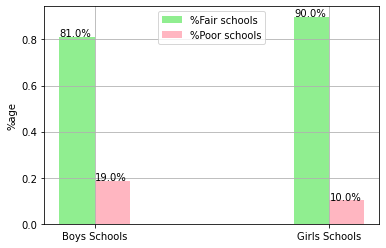

In [71]:
import numpy as np
import matplotlib.pyplot as plt

N = 2

ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, goodl, width, color='lightgreen')

rects2 = ax.bar(ind+width, poorl, width, color='lightpink')
# add some
ax.set_ylabel('%age')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Boys Schools', 'Girls Schools')) 

for p in ax.patches:
    ax.annotate(f'{str(round(p.get_height()*100,0))}%', (p.get_x() * 1.005, p.get_height() * 1.005))


ax.legend( (rects1[0], rects2[0]), ('%Fair schools','%Poor schools') , loc='upper center')
ax.grid()
plt.savefig('ssex_fair_poor.jpg', dpi=200, bbox_inches='tight')
plt.show()

A comparison was done between single sex schools to try to find out which of them performs better than the other and then investigate further.

All girls schools seem to perform better in England the all boys schools. 
85% of all girls schools are rated good/fair, while only 15% are rated as bad/poor.
whereas 71% of all boys schools are rated good/fair, with 29% rated as bad/poor.

In [72]:
osl = []
goodl = []
reqimpl = []
inadqtel = []
for gender in ['Boys','Girls']:
    os, good, reqimp, inadqte = get_ratings(gendf,gender)
    osl.append(os)
    goodl.append(good)
    reqimpl.append(reqimp)
    inadqtel.append(inadqte)

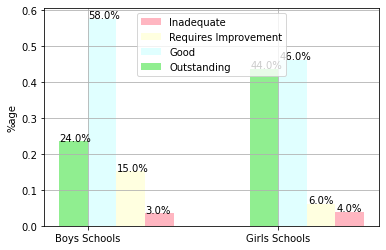

In [73]:
import numpy as np
import matplotlib.pyplot as plt

N = 2

ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, osl, width, color='lightgreen')

rects2 = ax.bar(ind+width, goodl, width, color='lightcyan')

rects3 = ax.bar(ind+width+width, reqimpl, width, color='lightyellow')

rects4 = ax.bar(ind+width+width+width, inadqtel, width, color='lightpink')
# add some
ax.set_ylabel('%age')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Boys Schools', 'Girls Schools')) 

for p in ax.patches:
    ax.annotate(f'{str(round(p.get_height()*100,0))}%', (p.get_x() * 1.005, p.get_height() * 1.005))


ax.legend( (rects4[0], rects3[0],rects2[0],rects1[0]), ('Inadequate','Requires Improvement','Good','Outstanding') , loc='upper center')
ax.grid()
plt.savefig('ssex_osfted.jpg', dpi=200, bbox_inches='tight')
plt.show()

## 3. How Girls/Boys ratio effect the school performance

Boys Vs Girls schools in england are almost equal. 48% Girls schools and 52% Boys schools.

In [74]:
pdf.head(4)

,URN,SCHNAME_x,LOCALITY,TOWN,GENDER,NORB,PNORB,NORG,PNORG,READPROG,WRITPROG,MATPROG
0,141279,Bringhurst Primary School,Bringhurst,Market Harborough,Mixed,85.0,53.1,75.0,46.9,2.6,2.3,2.0
1,119910,Buckminster Primary School,Buckminster,Grantham,Mixed,53.0,55.8,42.0,44.2,2.4,3.8,-1.0
2,139342,Great Dalby School,Great Dalby,Melton Mowbray,Mixed,84.0,57.5,62.0,42.5,0.9,0.4,0.7
3,119912,Burton-on-the-Wolds Primary School,Burton-on-the-Wolds,Loughborough,Mixed,94.0,52.2,86.0,47.8,3.4,2.5,4.1


In [75]:
def scale_r(x):
    minn = pdf['READPROG'].min()
    maxx = pdf['READPROG'].max()
    return (x - minn)/(maxx - minn)

def scale_w(x):
    minn = pdf['WRITPROG'].min()
    maxx = pdf['WRITPROG'].max()
    return (x - minn)/(maxx - minn)

def scale_m(x):
    minn = pdf['MATPROG'].min()
    maxx = pdf['MATPROG'].max()
    return (x - minn)/(maxx - minn)

In [76]:
pdf.loc[:,'READPROGSC'] = pdf['READPROG'].apply(scale_r)
pdf.loc[:,'WRITPROGSC'] = pdf['WRITPROG'].apply(scale_w)
pdf.loc[:,'MATPROGSC'] = pdf['MATPROG'].apply(scale_m)
pdf.loc[:,'PROG'] = pdf[['READPROGSC','WRITPROGSC','MATPROGSC']].mean(axis=1)
pdf.head(4)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,URN,SCHNAME_x,LOCALITY,TOWN,GENDER,NORB,PNORB,NORG,PNORG,READPROG,WRITPROG,MATPROG,READPROGSC,WRITPROGSC,MATPROGSC,PROG
0,141279,Bringhurst Primary School,Bringhurst,Market Harborough,Mixed,85.0,53.1,75.0,46.9,2.6,2.3,2.0,0.600509,0.677507,0.678771,0.652262
1,119910,Buckminster Primary School,Buckminster,Grantham,Mixed,53.0,55.8,42.0,44.2,2.4,3.8,-1.0,0.595420,0.718157,0.594972,0.636183
2,139342,Great Dalby School,Great Dalby,Melton Mowbray,Mixed,84.0,57.5,62.0,42.5,0.9,0.4,0.7,0.557252,0.626016,0.642458,0.608575
3,119912,Burton-on-the-Wolds Primary School,Burton-on-the-Wolds,Loughborough,Mixed,94.0,52.2,86.0,47.8,3.4,2.5,4.1,0.620865,0.682927,0.737430,0.680407


In [77]:
mxd_pdf.loc[:,'READPROGSC'] = mxd_pdf['READPROG'].apply(scale_r)
mxd_pdf.loc[:,'WRITPROGSC'] = mxd_pdf['WRITPROG'].apply(scale_w)
mxd_pdf.loc[:,'MATPROGSC'] = mxd_pdf['MATPROG'].apply(scale_m)
mxd_pdf.loc[:,'PROG'] = mxd_pdf[['READPROGSC','WRITPROGSC','MATPROGSC']].mean(axis=1)
mxd_pdf.head(4)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,URN,SCHNAME_x,LOCALITY,TOWN,GENDER,NORB,PNORB,NORG,PNORG,READPROG,WRITPROG,MATPROG,GBRATIO,READPROGSC,WRITPROGSC,MATPROGSC,PROG
0,141279,Bringhurst Primary School,Bringhurst,Market Harborough,Mixed,85.0,53.1,75.0,46.9,2.6,2.3,2.0,0.882353,0.600509,0.677507,0.678771,0.652262
1,119910,Buckminster Primary School,Buckminster,Grantham,Mixed,53.0,55.8,42.0,44.2,2.4,3.8,-1.0,0.792453,0.595420,0.718157,0.594972,0.636183
2,139342,Great Dalby School,Great Dalby,Melton Mowbray,Mixed,84.0,57.5,62.0,42.5,0.9,0.4,0.7,0.738095,0.557252,0.626016,0.642458,0.608575
3,119912,Burton-on-the-Wolds Primary School,Burton-on-the-Wolds,Loughborough,Mixed,94.0,52.2,86.0,47.8,3.4,2.5,4.1,0.914894,0.620865,0.682927,0.737430,0.680407


In [78]:
# Let us see how well the performance is on an Average if Girls are more than Boys in a school
hgpr = mxd_pdf[mxd_pdf['PNORG']>50]['READPROG']
hbpr = mxd_pdf[mxd_pdf['PNORB']>50]['READPROG']

hgpw = mxd_pdf[mxd_pdf['PNORG']>50]['WRITPROG']
hbpw = mxd_pdf[mxd_pdf['PNORB']>50]['WRITPROG']

hgpm = mxd_pdf[mxd_pdf['PNORG']>50]['MATPROG']
hbpm = mxd_pdf[mxd_pdf['PNORB']>50]['MATPROG']

bys = [hbpr.mean(), hbpw.mean(), hbpm.mean()]
gls = [hgpr.mean(), hgpw.mean(), hgpm.mean()]

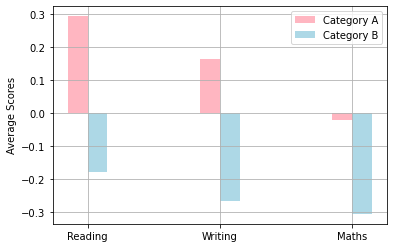

In [79]:
import numpy as np
import matplotlib.pyplot as plt

N = 3

ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, gls, width, color='lightpink')

rects2 = ax.bar(ind+width, bys, width, color='lightblue')

# add some
ax.set_ylabel('Average Scores')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Reading', 'Writing', 'Maths')) 

# for p in ax.patches:
#     ax.annotate(f'{str(round(p.get_height()*100,0))}%', (p.get_x() * 1.005, p.get_height() * 1.005))


ax.legend( (rects1[0], rects2[0]), ('Category A','Category B') , loc='upper right')
ax.grid()
plt.savefig('mxd_gbratio0.jpg', dpi=200, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

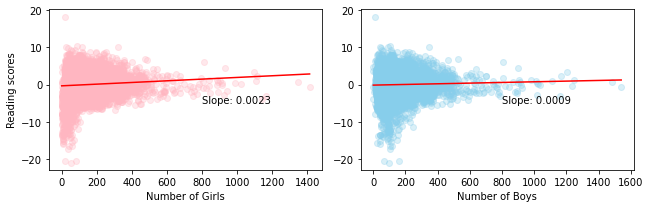

Slope of regression line for 'Number of Girls ~ Score' is Higher than that of 'Number of Boys ~ Score'


<Figure size 432x288 with 0 Axes>

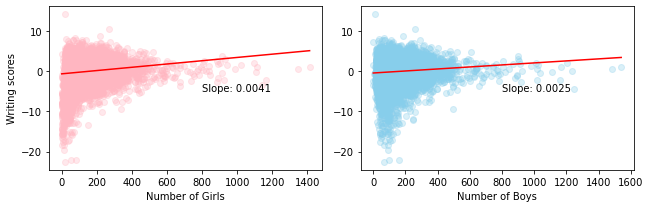

Slope of regression line for 'Number of Girls ~ Score' is Higher than that of 'Number of Boys ~ Score'


<Figure size 432x288 with 0 Axes>

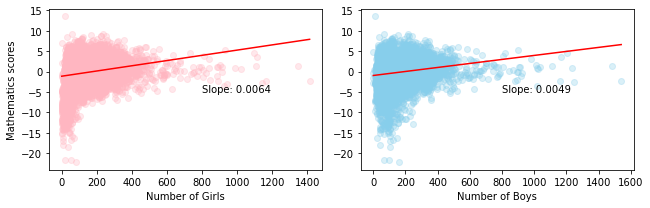

Slope of regression line for 'Number of Girls ~ Score' is Higher than that of 'Number of Boys ~ Score'


In [80]:
for col in ['READPROG','WRITPROG','MATPROG']:
    x1=pdf['NORG']
    x2=pdf['NORB']
    y = pdf[col]

    if col=='READPROG': 
        title='Reading Progress'
        ylab = 'Reading scores'
        file = 'read'
    if col=='WRITPROG': 
        title='Writing Progress'
        ylab = 'Writing scores'
        file = 'write'
    if col=='MATPROG': 
        title='Maths Progress'
        ylab = 'Mathematics scores'
        file = 'maths'

    from scipy.stats import linregress
    slopegirls = linregress(x1, y).slope
    slopeboys = linregress(x2, y).slope

    plt.figure()
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figheight(3)
    fig.set_figwidth(9)
    #     fig.suptitle(title)
    ax1.plot(x1, y, 'o', c='lightpink', alpha=0.3)
    ax1.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y, 1))(np.unique(x1)), c='red')
    ax1.set_xlabel('Number of Girls')
    ax1.set_ylabel(ylab)

    ax2.plot(x2, y, 'o', c='skyblue', alpha=0.3)
    ax2.plot(np.unique(x2), np.poly1d(np.polyfit(x2, y, 1))(np.unique(x2)), c='red')
    ax2.set_xlabel('Number of Boys')
    # ax2.set_ylabel('Progress scores')

    ax1.annotate(f'Slope: { round(slopegirls,4)}', (p.get_x() * 1.005 + 800, p.get_height() * 1.005-5))
    ax2.annotate(f'Slope: { round(slopeboys,4)}', (p.get_x() * 1.005 + 800, p.get_height() * 1.005-5)) 

    plt.tight_layout()
    plt.savefig(f'nb_ng_{file}_scores.jpg', dpi=200, bbox_inches='tight')
    plt.show()

    if slopeboys<slopegirls: print("Slope of regression line for 'Number of Girls ~ Score' is Higher than that of 'Number of Boys ~ Score'")   


<Figure size 432x288 with 0 Axes>

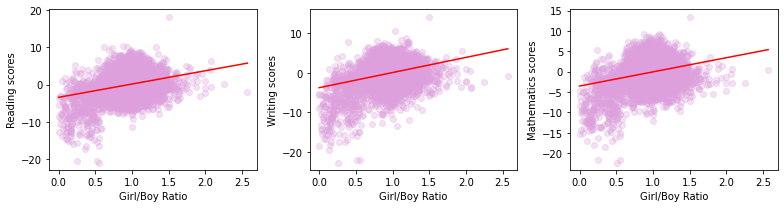

In [81]:
from scipy.stats import linregress
# for col in ['READPROG','WRITPROG','MATPROG','PROG']:

x1=mxd_pdf['GBRATIO']
y=mxd_pdf['READPROG']

if col=='READPROG': title='Reading Progress'
if col=='WRITPROG': title='Writing Progress'
if col=='MATPROG': title='Maths Progress'
if col=='PROG': title='Overall Progress'

plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(3)
fig.set_figwidth(11)

ax1.plot(x1, y, 'o', c='plum', alpha=0.3)
ax1.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y, 1))(np.unique(x1)), c='red')
ax1.set_xlabel('Girl/Boy Ratio')
ax1.set_ylabel(f'Reading scores')

y=mxd_pdf['WRITPROG']
ax2.plot(x1, y, 'o', c='plum', alpha=0.3)
ax2.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y, 1))(np.unique(x1)), c='red')
ax2.set_xlabel('Girl/Boy Ratio')
ax2.set_ylabel(f'Writing scores')

y=mxd_pdf['MATPROG']
ax3.plot(x1, y, 'o', c='plum', alpha=0.3)
ax3.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y, 1))(np.unique(x1)), c='red')
ax3.set_xlabel('Girl/Boy Ratio')
ax3.set_ylabel(f'Mathematics scores')


plt.tight_layout()
plt.savefig('gb_ratio.jpg', dpi=200, bbox_inches='tight')
plt.show()    

# 4.What do the top-5 Schools tell us?

In [91]:
scdf = pd.merge(schooldf[['URN','SCHNAME','TOWN','GENDER','OFSTEDRATING']], cdf, how='inner', on='URN')
scpdf = pd.merge(scdf, progdf, how='inner', on=['URN','SCHNAME'])

scpdf.loc[:,'READPROGSC'] = scpdf['READPROG'].apply(scale_r)
scpdf.loc[:,'WRITPROGSC'] = scpdf['WRITPROG'].apply(scale_w)
scpdf.loc[:,'MATPROGSC'] = scpdf['MATPROG'].apply(scale_m)
scpdf.loc[:,'PROG'] = scpdf[['READPROGSC','WRITPROGSC','MATPROGSC']].mean(axis=1)

scpdf = scpdf.dropna()
scpdf.head(2)

,URN,SCHNAME,TOWN,GENDER,OFSTEDRATING,NORG,NORB,PNORG,PNORB,READPROG,WRITPROG,MATPROG,READPROGSC,WRITPROGSC,MATPROGSC,PROG
0,100008,Argyle Primary School,London,Mixed,Good,187.0,163.0,53.4,46.6,-1.1,0.0,-1.6,0.506361,0.615176,0.578212,0.566583
1,100010,Brecknock Primary School,London,Mixed,Good,179.0,226.0,44.2,55.8,1.1,0.9,4.1,0.562341,0.639566,0.737430,0.646446


In [92]:
# Best schools

scpdf[(scpdf['OFSTEDRATING']=='Outstanding') & (scpdf['PROG']>0.7)].sort_values('PROG',ascending=False)[:10]

,URN,SCHNAME,TOWN,GENDER,OFSTEDRATING,NORG,NORB,PNORG,PNORB,READPROG,WRITPROG,MATPROG,READPROGSC,WRITPROGSC,MATPROGSC,PROG
332,100822,Boutcher Church of England Primary School,London,Mixed,Outstanding,118.0,89.0,57.0,43.0,10.0,5.2,6.7,0.788804,0.756098,0.810056,0.784986
10682,138446,Harris Primary Academy Coleraine Park,London,Mixed,Outstanding,221.0,210.0,51.3,48.7,6.7,5.7,8.8,0.704835,0.769648,0.868715,0.781066
3479,109963,Enborne C.E. Primary School,Newbury,Mixed,Outstanding,31.0,34.0,47.7,52.3,7.6,5.1,8.4,0.727735,0.753388,0.857542,0.779555
12302,141582,St Silas Church of England Primary School,Liverpool,Mixed,Outstanding,165.0,151.0,52.2,47.8,6.4,5.6,9.0,0.697201,0.766938,0.874302,0.779480
4252,112303,Ivegill CofE School,Carlisle,Mixed,Outstanding,41.0,37.0,52.6,47.4,8.5,6.9,4.7,0.750636,0.802168,0.754190,0.768998
341,100833,St Joseph's Catholic Primary School,London,Mixed,Outstanding,117.0,114.0,50.6,49.4,7.2,3.8,8.3,0.717557,0.718157,0.854749,0.763488
11683,140413,Hillcrest Academy,Leeds,Mixed,Outstanding,243.0,210.0,53.6,46.4,7.9,4.4,6.6,0.735369,0.734417,0.807263,0.759016
10336,137525,Edna G. Olds Academy,Nottingham,Mixed,Outstanding,115.0,122.0,48.5,51.5,6.2,7.3,5.1,0.692112,0.813008,0.765363,0.756828
11306,139723,Riverley Primary School,London,Mixed,Outstanding,241.0,212.0,53.2,46.8,7.1,3.8,7.1,0.715013,0.718157,0.821229,0.751466
319,100808,Riverside Primary School,London,Mixed,Outstanding,166.0,153.0,52.0,48.0,7.5,3.6,6.7,0.725191,0.712737,0.810056,0.749328
